In [1]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

from data_utils import *
from models_utils import *
from pkl_utils import *

In [2]:
df = get_raw_data('../data/allNamesClean.csv')

In [3]:
df_translit_ru = filter_data(df)

# No aggregation

Training best model and testing it

In [7]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru)

In [5]:
clf = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

In [6]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

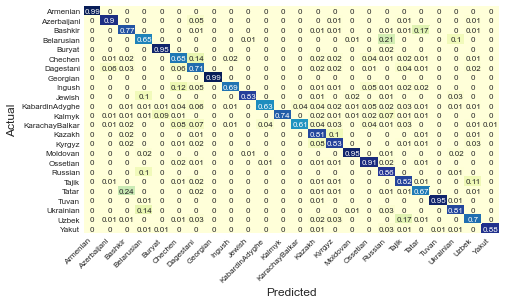

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9991	0.9894	0.9931	0.9913
Azerbaijani    	0.9902	0.8710	0.9036	0.8870
Bashkir        	0.9624	0.7580	0.7655	0.7617
Belarusian     	0.9524	0.7379	0.6547	0.6938
Buryat         	0.9957	0.9445	0.9494	0.9469
Chechen        	0.9829	0.7369	0.6840	0.7095
Dagestani      	0.9724	0.6883	0.7145	0.7011
Georgian       	0.9987	0.9860	0.9902	0.9881
Ingush         	0.9968	0.8590	0.6884	0.7643
Jewish         	0.9936	0.9158	0.8256	0.8684
KabardinAdyghe 	0.9962	0.8174	0.6303	0.7117
Kalmyk         	0.9969	0.9351	0.7423	0.8276
KarachayBalkar 	0.9962	0.8510	0.6062	0.7080
Kazakh         	0.9770	0.8168	0.8130	0.8149
Kyrgyz         	0.9779	0.8060	0.8265	0.8161
Moldovan       	0.9941	0.9382	0.9454	0.9418
Ossetian       	0.9934	0.8604	0.9081	0.8836
Russian        	0.9673	0.7130	0.8636	0.7811
Tajik          	0.9744	0.7801	0.8184	0.7988
Tatar          	0.9651	0.6757	0.6744	0.6751
Tuvan          	0.9985	0.9714	0.9520	0.9616
Ukrainian      	0.9784	0.7889	0.8072	0.7980


{'accuracy': 0.8154042508856012,
 'precision macro': 0.8402355553152511,
 'recall macro': 0.8060011363209284,
 'f1 macro': 0.8201588349215392}

In [7]:
test_model(clf, le, X_test, y_test, 'cm_full.tif')

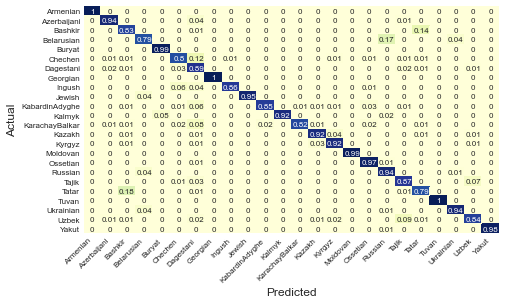

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9997	0.9961	0.9989	0.9975
Azerbaijani    	0.9945	0.9417	0.9422	0.9419
Bashkir        	0.9733	0.8303	0.8270	0.8286
Belarusian     	0.9775	0.9059	0.7873	0.8424
Buryat         	0.9989	0.9837	0.9923	0.9880
Chechen        	0.9905	0.8743	0.8032	0.8372
Dagestani      	0.9814	0.8096	0.8906	0.8482
Georgian       	0.9999	0.9992	0.9997	0.9994
Ingush         	0.9986	0.9482	0.8583	0.9010
Jewish         	0.9984	0.9851	0.9464	0.9654
KabardinAdyghe 	0.9986	0.9410	0.8515	0.8940
Kalmyk         	0.9991	0.9889	0.9204	0.9534
KarachayBalkar 	0.9984	0.9569	0.8220	0.8843
Kazakh         	0.9924	0.9382	0.9217	0.9299
Kyrgyz         	0.9915	0.9199	0.9237	0.9218
Moldovan       	0.9993	0.9943	0.9913	0.9928
Ossetian       	0.9981	0.9633	0.9689	0.9661
Russian        	0.9814	0.8167	0.9437	0.8756
Tajik          	0.9849	0.8793	0.8742	0.8768
Tatar          	0.9744	0.7748	0.7894	0.7820
Tuvan          	0.9999	0.9982	0.9982	0.9982
Ukrainian      	0.9932	0.9169	0.9409	0.9287


{'accuracy': 0.9043902366156787,
 'precision macro': 0.9258858085797484,
 'recall macro': 0.908737090888509,
 'f1 macro': 0.9163121694459755}

In [8]:
test_model(clf, le, X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [110]:
def print_person(X, y_corr, y_pred, probs, le):
    top_inds = probs.argsort()[-3:][::-1]
    ln, fn = X.split('#')
    print(
        'Name: {} {}; true: {}; pred: {}; top 3: {} {:1.4f}, {} {:1.4f}, {} {:1.4f}'.format(
            fn, ln, le.inverse_transform([y_corr])[0], le.inverse_transform([y_pred])[0],
            le.inverse_transform([top_inds[0]])[0], probs[top_inds[0]],
            le.inverse_transform([top_inds[1]])[0], probs[top_inds[1]],
            le.inverse_transform([top_inds[2]])[0], probs[top_inds[2]],
        )
    )
    
    
def show_insecure_correct_preds(X_test, y_test, y_pred, y_prob, le, insecurity=0.5):
    inds = y_pred == y_test
    X_correct = X_test[inds]
    y_correct = y_test[inds]
    y_prob_correct = y_prob[inds]
    cnt = 0
    
    for i in range(len(y_correct)):
        if np.max(y_prob_correct[i]) <= insecurity:
            print_person(X_correct[i], y_correct[i], y_correct[i], y_prob_correct[i], le)
            cnt += 1
    print()        
    print('Number of matches:', cnt)

def show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, security=0.6):
    inds = y_pred != y_test
    X_incorrect = X_test[inds]
    y_true = y_test[inds]
    y_incorrect = y_pred[inds]
    y_prob_incorrect = y_prob[inds]
    cnt = 0
    
    for i in range(len(y_prob_incorrect)):
        if np.max(y_prob_incorrect[i]) >= security:
            print_person(X_incorrect[i], y_true[i], y_incorrect[i], y_prob_incorrect[i], le)
            cnt += 1
    print()        
    print('Number of matches:', cnt)

Looking at model confidence

In [111]:
show_insecure_correct_preds(X_test, y_test, y_pred, y_prob, le, 0.35)

Name: Алишер Уланов; true: Kyrgyz; pred: Kyrgyz; top 3: Kyrgyz 0.3372, Uzbek 0.2836, KarachayBalkar 0.1750
Name: Саша Сапаев; true: Russian; pred: Russian; top 3: Russian 0.2713, Chechen 0.2197, Belarusian 0.1896
Name: Али Исламов; true: Dagestani; pred: Dagestani; top 3: Dagestani 0.2772, Chechen 0.2765, Tajik 0.1733
Name: Руслан Молчин; true: Russian; pred: Russian; top 3: Russian 0.2883, Belarusian 0.2844, Bashkir 0.2241
Name: Диана Касим; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.3147, Moldovan 0.2558, Belarusian 0.1739
Name: Хаким Ахмедов; true: Tajik; pred: Tajik; top 3: Tajik 0.3140, Dagestani 0.2999, Uzbek 0.2141
Name: Рустам Пшидаток; true: KabardinAdyghe; pred: KabardinAdyghe; top 3: KabardinAdyghe 0.3403, Belarusian 0.2586, Uzbek 0.1881
Name: Самир Балаев; true: KarachayBalkar; pred: KarachayBalkar; top 3: KarachayBalkar 0.2616, Azerbaijani 0.2310, Chechen 0.2308
Name: Серж Сябр; true: Belarusian; pred: Belarusian; top 3: Belarusian 0.2882, Ukrainian 0.2834, Kazakh 0.2008


Name: Диана Адам; true: Moldovan; pred: Moldovan; top 3: Moldovan 0.3474, Kazakh 0.2005, Dagestani 0.1877
Name: Динара Дисюкова; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.3185, Tatar 0.2699, Bashkir 0.2676
Name: Зухра Кузбекова; true: Bashkir; pred: Bashkir; top 3: Bashkir 0.3486, Kyrgyz 0.2473, Uzbek 0.2259
Name: Тимур Накусов; true: KabardinAdyghe; pred: KabardinAdyghe; top 3: KabardinAdyghe 0.3493, Ossetian 0.2940, Uzbek 0.0820
Name: Эльмира Халикова; true: Bashkir; pred: Bashkir; top 3: Bashkir 0.3236, Tatar 0.2880, Dagestani 0.2794
Name: Абдулла Абликим; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.3161, Dagestani 0.3040, Tajik 0.2017
Name: Мадина Тобагабулова; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.2835, Uzbek 0.2236, Dagestani 0.2073
Name: Карина Карина; true: Russian; pred: Russian; top 3: Russian 0.3425, Belarusian 0.3398, Moldovan 0.1557
Name: Эльвира Тепкенкиева; true: Kalmyk; pred: Kalmyk; top 3: Kalmyk 0.2467, KarachayBalkar 0.2059, Ingush 0.1590
Name: Анастасия Джих

In [115]:
show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, 0.6)

Name: Таня Бодрова; true: Belarusian; pred: Russian; top 3: Russian 0.6316, Ukrainian 0.2351, Belarusian 0.0850
Name: Анастасия Гайванович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 1.0000, Yakut 0.0000, Uzbek 0.0000
Name: Шахбоз Эралиев; true: Uzbek; pred: Tajik; top 3: Tajik 0.6466, Uzbek 0.1931, Kyrgyz 0.1603
Name: Ильназ Гильванов; true: Bashkir; pred: Tatar; top 3: Tatar 0.6482, Bashkir 0.3518, Yakut 0.0000
Name: Андрей Миров; true: Belarusian; pred: Russian; top 3: Russian 0.6221, Belarusian 0.3779, Yakut 0.0000
Name: Шейх Хизриев; true: Chechen; pred: Dagestani; top 3: Dagestani 0.8134, Chechen 0.0994, Jewish 0.0872
Name: Кирилл Лысков; true: Belarusian; pred: Russian; top 3: Russian 0.7610, Belarusian 0.2381, Yakut 0.0009
Name: Абийир Касенов; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.9743, Kyrgyz 0.0176, Dagestani 0.0081
Name: Бекхруз Мустафоев; true: Uzbek; pred: Tajik; top 3: Tajik 0.9514, Ingush 0.0486, Yakut 0.0000
Name: Юрий Шерченков; true: Russian; pred: Be

Name: Варя Исаенко; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.8208, Belarusian 0.1792, Yakut 0.0000
Name: Салават Габдрахманов; true: Bashkir; pred: Tatar; top 3: Tatar 0.6396, Bashkir 0.3604, Yakut 0.0000
Name: Сулейман Великолепный; true: Tatar; pred: Dagestani; top 3: Dagestani 0.6235, Belarusian 0.1610, Azerbaijani 0.1433
Name: Вероника Чиреш; true: Moldovan; pred: Belarusian; top 3: Belarusian 0.7060, Moldovan 0.2832, Jewish 0.0108
Name: Ольга Швец; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.7097, Jewish 0.1706, Ukrainian 0.1197
Name: Рушана Муратова; true: Kazakh; pred: Bashkir; top 3: Bashkir 0.8585, Kazakh 0.0709, Kyrgyz 0.0449
Name: Федор Капылов; true: Tajik; pred: Russian; top 3: Russian 0.8436, Uzbek 0.1564, Yakut 0.0000
Name: Гульсина Гайнулина; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6310, Tatar 0.3690, Yakut 0.0000
Name: Диыор Ашуров; true: Tajik; pred: Uzbek; top 3: Uzbek 0.7852, Tajik 0.2148, Yakut 0.0000
Name: Евгений Казанцев; true: Belar

Name: Ызат Каратаев; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.6661, Kyrgyz 0.2848, Chechen 0.0275
Name: Дарья Лесина; true: Belarusian; pred: Russian; top 3: Russian 0.6692, Belarusian 0.3308, Yakut 0.0000
Name: Зухриддин Заитов; true: Kazakh; pred: Uzbek; top 3: Uzbek 0.8069, Tajik 0.1931, Yakut 0.0000
Name: Никита Долгов; true: Belarusian; pred: Russian; top 3: Russian 0.6412, Belarusian 0.2915, Ingush 0.0344
Name: Альма Улюкова; true: Kalmyk; pred: Bashkir; top 3: Bashkir 0.6495, Kalmyk 0.3505, Uzbek 0.0000
Name: Екатерина Рябова; true: Belarusian; pred: Russian; top 3: Russian 0.8945, Belarusian 0.1055, Yakut 0.0000
Name: Айдина Караева; true: KarachayBalkar; pred: Kyrgyz; top 3: Kyrgyz 0.8193, Ossetian 0.1668, KarachayBalkar 0.0139
Name: Влад Кадыров; true: Bashkir; pred: Belarusian; top 3: Belarusian 0.8935, Tatar 0.1065, Yakut 0.0000
Name: Салтанат Аликулова; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.6373, Kyrgyz 0.3278, Dagestani 0.0348
Name: Гулнур Баиасова; true: Kyrgyz;

Name: Арсен Алимов; true: Kyrgyz; pred: Dagestani; top 3: Dagestani 0.6466, KarachayBalkar 0.1385, Kazakh 0.1371
Name: Александр Олейник; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.7447, Ukrainian 0.2006, Jewish 0.0452
Name: Марат Умаров; true: Uzbek; pred: Dagestani; top 3: Dagestani 0.6055, Kyrgyz 0.3092, Chechen 0.0596
Name: Али Даталов; true: Dagestani; pred: Chechen; top 3: Chechen 0.8832, Dagestani 0.0733, Tajik 0.0261
Name: Анастасия Верешко; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.8335, Ukrainian 0.1665, Yakut 0.0000
Name: Мурад Холиков; true: Uzbek; pred: Tajik; top 3: Tajik 0.7338, Dagestani 0.2575, Uzbek 0.0088
Name: Дора Чонаев; true: Kalmyk; pred: Tajik; top 3: Tajik 0.6530, Buryat 0.1623, Kalmyk 0.1366
Name: Иван Галузин; true: Belarusian; pred: Russian; top 3: Russian 0.7370, Ukrainian 0.1418, Moldovan 0.0604
Name: Сулайман Атанов; true: Dagestani; pred: Kyrgyz; top 3: Kyrgyz 0.7167, Tajik 0.1982, Dagestani 0.0630
Name: Озода Саидзода; true: Uz

Name: Игорь Гулюк; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.9065, Belarusian 0.0786, Tatar 0.0149
Name: Тохир Пулатов; true: Tajik; pred: Uzbek; top 3: Uzbek 0.7017, Tajik 0.2983, Yakut 0.0000
Name: Ангел Бекмуратов; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.8008, Belarusian 0.1402, Uzbek 0.0590
Name: Айдин Азизов; true: Dagestani; pred: Kyrgyz; top 3: Kyrgyz 0.6483, Azerbaijani 0.2150, Tajik 0.0950
Name: Мария Елизарова; true: Belarusian; pred: Russian; top 3: Russian 0.7392, Belarusian 0.1615, Ossetian 0.0993
Name: Аман Асанов; true: Kazakh; pred: Kyrgyz; top 3: Kyrgyz 0.7878, Kazakh 0.2077, KarachayBalkar 0.0045
Name: Екатерина Алексеева; true: Belarusian; pred: Russian; top 3: Russian 0.7255, Belarusian 0.2492, Buryat 0.0253
Name: Анастасия Густова; true: Belarusian; pred: Russian; top 3: Russian 0.7335, Belarusian 0.2312, Ossetian 0.0353
Name: Игорь Маскальчук; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.6072, Belarusian 0.2010, Russian 0.1918
Name: Алекса

Name: Снежана Сандуу; true: Tuvan; pred: Moldovan; top 3: Moldovan 0.6451, Tuvan 0.3549, Yakut 0.0000
Name: Азизбек Мирокхуров; true: Tajik; pred: Uzbek; top 3: Uzbek 0.8600, Tajik 0.0789, Kyrgyz 0.0611
Name: Маргарита Забавина; true: Belarusian; pred: Russian; top 3: Russian 0.7074, Belarusian 0.1794, Bashkir 0.1131
Name: Айрат Аскаров; true: Bashkir; pred: Tatar; top 3: Tatar 0.6113, Bashkir 0.3341, Yakut 0.0337
Name: Арина Петрова; true: Belarusian; pred: Russian; top 3: Russian 0.7444, Belarusian 0.2019, Yakut 0.0537
Name: Екатерина Зарапина; true: Belarusian; pred: Russian; top 3: Russian 0.7838, Belarusian 0.2093, Tatar 0.0069
Name: Айнур Гильманов; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6584, Tatar 0.3416, Yakut 0.0000
Name: Ксюша Подвысоцкая; true: Russian; pred: Belarusian; top 3: Belarusian 0.6202, Russian 0.3380, Yakut 0.0418
Name: Лера Лесогорова; true: Belarusian; pred: Russian; top 3: Russian 0.7245, Belarusian 0.1217, Ukrainian 0.0841
Name: Лейсан Саттарова; true: 

Name: Андрей Лавренчук; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.7207, Ukrainian 0.2390, Jewish 0.0292
Name: Олим Ходиев; true: Uzbek; pred: Tajik; top 3: Tajik 0.7211, Uzbek 0.1967, Ossetian 0.0822
Name: Анваржон Туранов; true: Tajik; pred: Uzbek; top 3: Uzbek 0.9483, KabardinAdyghe 0.0517, Yakut 0.0000
Name: Алексей Онкуров; true: Kalmyk; pred: Russian; top 3: Russian 0.8210, Belarusian 0.1475, Buryat 0.0225
Name: Айсылу Шайхаттарова; true: Bashkir; pred: Tatar; top 3: Tatar 0.6702, Bashkir 0.2344, Kazakh 0.0625
Name: Амина Садертдинова; true: Bashkir; pred: Tatar; top 3: Tatar 0.9045, Bashkir 0.0955, Yakut 0.0000
Name: Улугбек Ахунов; true: Kyrgyz; pred: Uzbek; top 3: Uzbek 0.8789, Kyrgyz 0.1027, Tajik 0.0185
Name: Никита Хижняк; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.6106, Belarusian 0.3894, Yakut 0.0000
Name: Светлана Мороз; true: Russian; pred: Belarusian; top 3: Belarusian 0.6555, Russian 0.2154, Ukrainian 0.0741
Name: Адилет Сагындык; true: Kyrgyz; 

Name: Ляйсан Салахова; true: Bashkir; pred: Tatar; top 3: Tatar 0.9497, Bashkir 0.0503, Yakut 0.0000
Name: Ринат Шарафутдинов; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6527, Tatar 0.3473, Yakut 0.0000
Name: Назар Кабанчук; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.7933, KabardinAdyghe 0.1098, Belarusian 0.0970
Name: Эльвин Мамедов; true: Dagestani; pred: Azerbaijani; top 3: Azerbaijani 0.8049, Dagestani 0.1951, Yakut 0.0000
Name: Санабар Аратбекова; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.6086, Kyrgyz 0.3204, Dagestani 0.0710
Name: Ирина Волкова; true: Belarusian; pred: Russian; top 3: Russian 0.8589, Belarusian 0.1411, Yakut 0.0000
Name: Ильдар Садыков; true: Bashkir; pred: Tatar; top 3: Tatar 0.6130, Bashkir 0.3870, Yakut 0.0000
Name: Леся Вишневская; true: Russian; pred: Belarusian; top 3: Belarusian 0.6942, Ukrainian 0.1425, Russian 0.1324
Name: Бакыт Ашимов; true: Kazakh; pred: Kyrgyz; top 3: Kyrgyz 0.8696, Kazakh 0.1304, Yakut 0.0000
Name: Иван Бунга; true: Uk

In [113]:
show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, 0.9)

Name: Анастасия Гайванович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 1.0000, Yakut 0.0000, Uzbek 0.0000
Name: Абийир Касенов; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.9743, Kyrgyz 0.0176, Dagestani 0.0081
Name: Бекхруз Мустафоев; true: Uzbek; pred: Tajik; top 3: Tajik 0.9514, Ingush 0.0486, Yakut 0.0000
Name: Сабина Калдыкова; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.9277, Kyrgyz 0.0723, Yakut 0.0000
Name: Айгуль Баранукова; true: Dagestani; pred: Bashkir; top 3: Bashkir 0.9278, KabardinAdyghe 0.0722, Yakut 0.0000
Name: Голуся Ахметгалеева; true: Bashkir; pred: Tatar; top 3: Tatar 1.0000, Yakut 0.0000, KabardinAdyghe 0.0000
Name: Азизбек Хурамов; true: Tatar; pred: Uzbek; top 3: Uzbek 0.9681, Azerbaijani 0.0319, Yakut 0.0000
Name: Светлана Боскина; true: Belarusian; pred: Russian; top 3: Russian 0.9409, Belarusian 0.0506, Yakut 0.0085
Name: Шохрух Мараимов; true: Tajik; pred: Uzbek; top 3: Uzbek 0.9428, Tajik 0.0572, Yakut 0.0000
Name: Айбек Мурзаев; true: Kazakh; pre

In [15]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru, test_size=0.0)
clf = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

# Aggregated

Same things for aggregated setup

In [8]:
df_agr = df
df_agr.ethn = df.ethn.apply(aggregate_ethnos)
df_translit_ru_agr = filter_data(df_agr)

In [9]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr)

In [10]:
clf_agr = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

In [11]:
clf_agr.fit(X_train_a, y_train_a)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

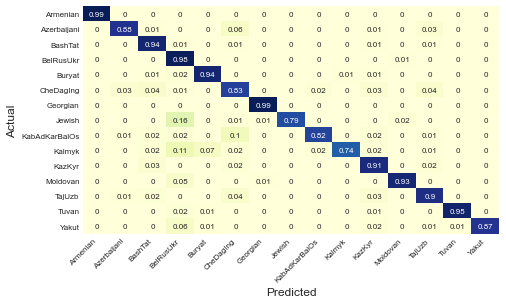

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9992	0.9905	0.9942	0.9924
Azerbaijani    	0.9908	0.8983	0.8846	0.8914
BashTat        	0.9816	0.9197	0.9434	0.9314
BelRusUkr      	0.9829	0.9359	0.9832	0.9589
Buryat         	0.9961	0.9604	0.9444	0.9523
CheDagIng      	0.9703	0.8131	0.8343	0.8235
Georgian       	0.9989	0.9870	0.9930	0.9900
Jewish         	0.9935	0.9438	0.7928	0.8618
KabAdKarBalOs  	0.9882	0.9021	0.8163	0.8571
Kalmyk         	0.9971	0.9530	0.7435	0.8353
KazKyr         	0.9790	0.9120	0.9146	0.9133
Moldovan       	0.9945	0.9592	0.9316	0.9452
TajUzb         	0.9784	0.9135	0.8976	0.9055
Tuvan          	0.9984	0.9679	0.9454	0.9565
Yakut          	0.9987	0.9836	0.8667	0.9214


{'accuracy': 0.9238903938320483,
 'precision macro': 0.9360045146264696,
 'recall macro': 0.89903355455961,
 'f1 macro': 0.9157354607602727}

In [12]:
test_model(clf_agr, le_a, X_test_a, y_test_a, 'cm_agr.tif')

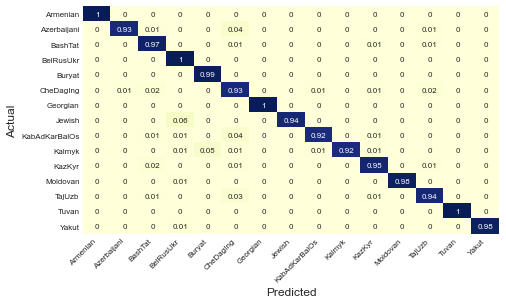

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9998	0.9970	0.9989	0.9980
Azerbaijani    	0.9948	0.9533	0.9346	0.9438
BashTat        	0.9907	0.9618	0.9703	0.9660
BelRusUkr      	0.9956	0.9812	0.9962	0.9886
Buryat         	0.9989	0.9855	0.9900	0.9878
CheDagIng      	0.9834	0.8986	0.9339	0.9159
Georgian       	1.0000	0.9994	0.9997	0.9996
Jewish         	0.9982	0.9840	0.9380	0.9604
KabAdKarBalOs  	0.9958	0.9762	0.9241	0.9494
Kalmyk         	0.9991	0.9921	0.9156	0.9523
KazKyr         	0.9911	0.9653	0.9534	0.9593
Moldovan       	0.9991	0.9959	0.9841	0.9900
TajUzb         	0.9882	0.9516	0.9421	0.9468
Tuvan          	0.9999	0.9986	0.9961	0.9973
Yakut          	0.9998	0.9976	0.9762	0.9868


{'accuracy': 0.967144180210325,
 'precision macro': 0.9758613491143255,
 'recall macro': 0.9635515620179178,
 'f1 macro': 0.9694715276168081}

In [13]:
test_model(clf_agr, le_a, X_train_a, y_train_a)

In [101]:
y_pred_a = clf_agr.predict(X_test_a)
y_prob_a = clf_agr.predict_proba(X_test_a)

In [116]:
show_insecure_correct_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.35)

Name: Кира Гарцкия; true: Georgian; pred: Georgian; top 3: Georgian 0.3374, BelRusUkr 0.2568, BashTat 0.2082
Name: Ислам Бабатов; true: CheDagIng; pred: CheDagIng; top 3: CheDagIng 0.3368, Azerbaijani 0.2490, KabAdKarBalOs 0.1954
Name: Марат Бабаев; true: CheDagIng; pred: CheDagIng; top 3: CheDagIng 0.2995, Azerbaijani 0.2907, KabAdKarBalOs 0.1950
Name: Минара Ибраева; true: KazKyr; pred: KazKyr; top 3: KazKyr 0.3230, CheDagIng 0.3181, BashTat 0.3116
Name: Тимур Баратов; true: TajUzb; pred: TajUzb; top 3: TajUzb 0.3128, CheDagIng 0.2333, BashTat 0.1776
Name: Каусар Сахи; true: KazKyr; pred: KazKyr; top 3: KazKyr 0.2938, Georgian 0.2476, Moldovan 0.2006
Name: Вадик Курмаев; true: KabAdKarBalOs; pred: KabAdKarBalOs; top 3: KabAdKarBalOs 0.3337, BashTat 0.3019, CheDagIng 0.2113
Name: Аират Саликхов; true: BashTat; pred: BashTat; top 3: BashTat 0.3221, TajUzb 0.2745, KazKyr 0.2656
Name: Алиева Мунирка; true: TajUzb; pred: TajUzb; top 3: TajUzb 0.3389, BashTat 0.3357, CheDagIng 0.3254
Name:

In [117]:
show_secure_incorrect_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.6)

Name: Сергей Троян; true: Moldovan; pred: Armenian; top 3: Armenian 0.7251, BelRusUkr 0.2625, Moldovan 0.0125
Name: Азар Хайдаров; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.7710, BashTat 0.1774, Buryat 0.0516
Name: Залина Хулагова; true: CheDagIng; pred: KabAdKarBalOs; top 3: KabAdKarBalOs 0.8835, CheDagIng 0.1165, Yakut 0.0000
Name: Азамат Салахов; true: CheDagIng; pred: BashTat; top 3: BashTat 0.7239, KabAdKarBalOs 0.1961, CheDagIng 0.0799
Name: Марк Тростанетский; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.7674, Jewish 0.1209, KabAdKarBalOs 0.0912
Name: Гульсасак Сатыбалдина; true: BashTat; pred: KazKyr; top 3: KazKyr 0.6349, BashTat 0.3651, Yakut 0.0000
Name: Азамат Сарногоев; true: KazKyr; pred: KabAdKarBalOs; top 3: KabAdKarBalOs 0.7846, TajUzb 0.1618, KazKyr 0.0536
Name: Дамир Исин; true: KazKyr; pred: BashTat; top 3: BashTat 0.6591, KazKyr 0.3409, Yakut 0.0000
Name: Асия Исаева; true: KazKyr; pred: CheDagIng; top 3: CheDagIng 0.7147, KazKyr 0.2853, Yakut 0.0000
Name: Р

Name: Джаббар Шахбазов; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 0.7548, TajUzb 0.1765, CheDagIng 0.0687
Name: Омар Магарламов; true: Azerbaijani; pred: CheDagIng; top 3: CheDagIng 0.6860, Azerbaijani 0.2698, KabAdKarBalOs 0.0442
Name: Сергей Саянов; true: Buryat; pred: BelRusUkr; top 3: BelRusUkr 0.8646, Buryat 0.1354, Yakut 0.0000
Name: Вячеслав Гасанов; true: KabAdKarBalOs; pred: BelRusUkr; top 3: BelRusUkr 0.6020, Azerbaijani 0.2446, Buryat 0.0890
Name: Каралина Меньгель; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.7042, Jewish 0.1521, KazKyr 0.1161
Name: Назка Кокоева; true: KazKyr; pred: KabAdKarBalOs; top 3: KabAdKarBalOs 0.7477, KazKyr 0.2523, Yakut 0.0000
Name: Тамир Родионов; true: Buryat; pred: BelRusUkr; top 3: BelRusUkr 0.8444, Buryat 0.0828, KabAdKarBalOs 0.0728
Name: Вадим Карасик; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Равиль Набиев; true: CheDagIng; pred: BashTat; top 3: BashTat 0.6874, CheDagIng 0.2

Name: Виталий Маковейчук; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Юсуф Шакирзянов; true: TajUzb; pred: BashTat; top 3: BashTat 0.8185, TajUzb 0.1815, Yakut 0.0000
Name: Гульназ Ахметова; true: KazKyr; pred: BashTat; top 3: BashTat 0.8347, KazKyr 0.1653, Yakut 0.0000
Name: Игорь Чаплинский; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.8780, CheDagIng 0.0707, Jewish 0.0392
Name: Даша Кушнирович; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.9361, BashTat 0.0639, Yakut 0.0000
Name: Гули Кочкарова; true: TajUzb; pred: KabAdKarBalOs; top 3: KabAdKarBalOs 0.7327, KazKyr 0.1460, BashTat 0.0992
Name: Хезрет Сахбалаыев; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Алина Бочарова; true: KabAdKarBalOs; pred: BelRusUkr; top 3: BelRusUkr 0.8236, BashTat 0.1368, KabAdKarBalOs 0.0222
Name: Эркинбек Давранов; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.6596, KazKyr 0.3404, Yakut 0.0000
Name: Ро

Name: Джулия Мугарамовна; true: CheDagIng; pred: BashTat; top 3: BashTat 0.7163, CheDagIng 0.1414, Tuvan 0.0510
Name: Абрахам Барбер; true: Armenian; pred: Jewish; top 3: Jewish 0.9016, CheDagIng 0.0655, TajUzb 0.0328
Name: Амир Мусаев; true: TajUzb; pred: CheDagIng; top 3: CheDagIng 0.7313, TajUzb 0.1877, KazKyr 0.0810
Name: Камила Дудова; true: KabAdKarBalOs; pred: CheDagIng; top 3: CheDagIng 0.7127, TajUzb 0.1984, Azerbaijani 0.0889
Name: Маис Мамедов; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 0.9438, CheDagIng 0.0492, KabAdKarBalOs 0.0070
Name: Сергей Абдулаев; true: BelRusUkr; pred: CheDagIng; top 3: CheDagIng 0.7445, BelRusUkr 0.1900, KabAdKarBalOs 0.0655
Name: Азимов Абдугафар; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.7690, KazKyr 0.1270, Azerbaijani 0.0543
Name: Дарья Узун; true: Moldovan; pred: BelRusUkr; top 3: BelRusUkr 0.7295, Moldovan 0.2090, Tuvan 0.0615
Name: Алла Горелик; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.8804, Moldovan 0.0512, Jewish 0.0

In [118]:
show_secure_incorrect_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.9)

Name: Умуд Хациыев; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 0.9546, TajUzb 0.0454, Yakut 0.0000
Name: Илья Цвик; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Фокхир Ыусуфбеков; true: KazKyr; pred: TajUzb; top 3: TajUzb 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Ибрагим Исаев; true: TajUzb; pred: CheDagIng; top 3: CheDagIng 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Маша Фурик; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.9482, TajUzb 0.0304, Georgian 0.0214
Name: Ситдиков Ильгиз; true: TajUzb; pred: BashTat; top 3: BashTat 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Георгий Мовилян; true: Moldovan; pred: Armenian; top 3: Armenian 0.9326, Georgian 0.0674, Yakut 0.0000
Name: Алина Давыдова; true: BashTat; pred: BelRusUkr; top 3: BelRusUkr 0.9891, CheDagIng 0.0109, Yakut 0.0000
Name: Жанболат Жусалин; true: BashTat; pred: KazKyr; top 3: KazKyr 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Али Гамзатов; true: KabAdKarBalOs; pred: CheDagIn

Name: Абрахам Барбер; true: Armenian; pred: Jewish; top 3: Jewish 0.9016, CheDagIng 0.0655, TajUzb 0.0328
Name: Маис Мамедов; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 0.9438, CheDagIng 0.0492, KabAdKarBalOs 0.0070
Name: Роман Прозуровский; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.9977, Jewish 0.0023, Yakut 0.0000
Name: Марианна Нурутдинова; true: CheDagIng; pred: BashTat; top 3: BashTat 0.9609, CheDagIng 0.0391, Yakut 0.0000
Name: Мурад Исмаыилов; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 0.9798, CheDagIng 0.0202, Yakut 0.0000
Name: Сухроб Султанов; true: KazKyr; pred: TajUzb; top 3: TajUzb 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: Гузеля Балтиева; true: KazKyr; pred: BashTat; top 3: BashTat 0.9462, KabAdKarBalOs 0.0479, Kalmyk 0.0059
Name: Андрей Карык; true: Moldovan; pred: BelRusUkr; top 3: BelRusUkr 0.9092, KazKyr 0.0908, Yakut 0.0000
Name: Залена Генжибаева; true: CheDagIng; pred: Buryat; top 3: Buryat 0.9887, CheDagIng 0.0113, Yakut 0.0000
Name:

In [14]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr, test_size=0.0)
clf_agr = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])
clf_agr.fit(X_train_a, y_train_a)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

# Save models

In [16]:
save_pkl('models/all_classes_model.pkl', clf)

In [17]:
save_pkl('models/aggregated_classes_model.pkl', clf_agr)

In [18]:
save_pkl('models/label_encoder.pkl', le)

In [19]:
save_pkl('models/aggregated_label_encoder.pkl', le_a)